In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.figure_factory as ff
import seaborn as sns
import numpy as np
import string

# Removing stop words like 'the', 'a', 'an', 'in'
from nltk.corpus import stopwords

# Return the ngrams generated from a sequence of items, as an iterator
from nltk.util import ngrams

# Convert a collection of text documents to a matrix of token counts
from sklearn.feature_extraction.text import CountVectorizer
from  sklearn.metrics  import accuracy_score, confusion_matrix
from plotly.subplots import make_subplots

from collections import defaultdict
from collections import  Counter
plt.style.use('ggplot')
stop=set(stopwords.words('english'))
import re
import nltk
from nltk.tokenize import word_tokenize
import gensim
import string
from tqdm import tqdm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

# Machine Learning
from sklearn.naive_bayes import MultinomialNB # good one
from sklearn.linear_model import LogisticRegression # best
from lightgbm import LGBMClassifier

D:\Programy\AnacondaPython\ANACONDA\envs\Kaggle\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
tweet = pd.read_csv('D:/Python/Anaconda/Kaggle/Working/Natural Language Processing with Disaster Tweets/nlp-getting-started/train.csv')
test = pd.read_csv('D:/Python/Anaconda/Kaggle/Working/Natural Language Processing with Disaster Tweets/nlp-getting-started/test.csv')

In [3]:
tweet.head(3)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1


In [4]:
print('There are {} rows and {} columns in train'.format(tweet.shape[0],tweet.shape[1]))
print('There are {} rows and {} columns in train'.format(test.shape[0],test.shape[1]))

There are 7613 rows and 5 columns in train
There are 3263 rows and 4 columns in train


In [5]:
fig = go.Figure()

to_plot = tweet['target'].replace({0: 'Not disaster', 1: 'Disaster'}).value_counts()
labels = to_plot.index
values = to_plot.values

fig.add_trace(go.Pie(
    labels = labels,
    values = values,
    textinfo='label+percent'
))

fig.update_layout(
    title_text='Target balance',
    template='plotly_dark'
)

<h1>Number of characters in tweets</h1>

In [6]:
fig = make_subplots(rows=1, cols=2, subplot_titles=('Disaster tweets', 'No disaster tweets'))

tweet_len_1 = tweet[tweet['target']==1]['text'].str.len()

fig.add_trace(
    go.Histogram(x = tweet_len_1, name='Disaster tweets'),
    row=1,
    col=1
    )


tweet_len_0 = tweet[tweet['target']==0]['text'].str.len()

fig.add_trace(
    go.Histogram(x = tweet_len_0, name='No disaster tweets'),
    row=1,
    col=2
    )

fig.update_layout(
    showlegend=False,
    title_text='Characters in tweets',
    template='plotly_dark'
)

<h1>Number of words in tweets</h1>

In [7]:
fig = make_subplots(rows=1, cols=2, subplot_titles=('Disaster tweets', 'No disaster tweets'))

tweet_len_1 = tweet[tweet['target']==1]['text'].str.split().map(lambda x: len(x))

fig.add_trace(
    go.Histogram(x = tweet_len_1, name='Disaster tweets'),
    row=1,
    col=1
    )


tweet_len_0 = tweet[tweet['target']==0]['text'].str.split().map(lambda x: len(x))

fig.add_trace(
    go.Histogram(x = tweet_len_0, name='No disaster tweets'),
    row=1,
    col=2
    )

fig.update_layout(
    showlegend=False,
    title_text='Characters in tweets',
    template='plotly_dark'
)

<h1>Average word length in a tweet</h1>

In [8]:
word_dis = tweet[tweet['target']==1]['text'].str.split().apply(lambda x: [len(i) for i in x])
word_ndis = tweet[tweet['target']==0]['text'].str.split().apply(lambda x: [len(i) for i in x])

fig = ff.create_distplot(
    [word_dis.map(lambda x: np.mean(x)), word_ndis.map(lambda x: np.mean(x))],
    ['Disaster', 'No disaster'],
    bin_size=0.2,
    colors=['#ff5050', '#0066ff']
)

fig.update_layout(
    title_text = 'Average word length in each tweet',
    template='plotly_dark'
)

fig.show()

<h1>Common stopwords in tweets</h1>

In [9]:
def words_list(target):
    words = []

    for x in tweet[tweet['target']==target]['text'].str.split():
        for i in x:
            words.append(i)
    return words

In [10]:
words_list_0 = words_list(0)
dic = defaultdict(int)

for word in words_list_0:
    if word in stop:
        dic[word] += 1
        
top=sorted(dic.items(), key=lambda x:x[1], reverse=True)[:10] 

In [11]:
fig = go.Figure()

x, y = zip(*top)

fig.add_trace(go.Bar(
    x = x,
    y = y
))

fig.update_layout(
    title_text='Common stopwords in tweets with class 0',
    template='plotly_dark'
)

In [12]:
words_list_1 = words_list(1)
dic = defaultdict(int)

for word in words_list_0:
    if word in stop:
        dic[word] += 1
        
top=sorted(dic.items(), key=lambda x:x[1], reverse=True)[:10] 

In [13]:
fig = go.Figure()

x, y = zip(*top)

fig.add_trace(go.Bar(
    x = x,
    y = y
))

fig.update_layout(
    title_text='Common stopwords in tweets with class 1',
    template='plotly_dark'
)

<h1>Analyzing punctuations</h1>

In [14]:
punctuations = words_list(0)

dic = defaultdict(int)
special = string.punctuation
for i in punctuations:
    if i in special:
        dic[i] += 1

x, y = zip(*dic.items())

In [15]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x = x,
    y = y
))

fig.update_layout(
    title_text = 'Punctuations for class 0',
    template='plotly_dark'
)

In [16]:
punctuations = words_list(1)

dic = defaultdict(int)
special = string.punctuation
for i in punctuations:
    if i in special:
        dic[i] += 1

x, y = zip(*dic.items())

In [17]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x = x,
    y = y
))

fig.update_layout(
    title_text = 'Punctuations for class 1',
    template='plotly_dark'
)

<h1>Common words</h1>

In [18]:
counter = Counter(words_list(1))
most = counter.most_common()
x = list()
y = list()

for word, count in most[:40]:
    if word not in stop:
        x.append(word)
        y.append(count)

In [19]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x = x,
    y = y
))

fig.update_layout(
    title_text = 'Common words for class 1',
    template='plotly_dark'
)

In [20]:
counter = Counter(words_list(0))
most = counter.most_common()
x = list()
y = list()

for word, count in most[:40]:
    if word not in stop:
        x.append(word)
        y.append(count)

In [21]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x = x,
    y = y
))

fig.update_layout(
    title_text = 'Common words for class 1',
    template='plotly_dark'
)

<h1>Ngram analysis</h1>

In [22]:
def get_top_tweet_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2,2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [23]:
fig = go.Figure()

top_tweet_bigrams = get_top_tweet_bigrams(tweet['text'])[:10]
x, y = map(list, zip(*top_tweet_bigrams))

fig.add_trace(go.Bar(
    x = x,
    y = y
))

fig.update_layout(
    title_text = 'Bigrams',
    template='plotly_dark'
)

<h1> Data Cleaning </h1>

In [24]:
df = pd.concat([tweet, test])
df.shape

(10876, 5)

<h2> Removing urls </h2>

In [25]:
test = "New competition launched :https://www.kaggle.com/c/nlp-getting-started"

In [26]:
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)

In [27]:
remove_URL(test)

'New competition launched :'

In [28]:
# Delete url from all rows
df['text'] = df['text'].apply(lambda x: remove_URL(x))

<h1>Removing HTML tags</h1>

In [29]:
test = """<div>
<h1>Real or Fake</h1>
<p>Kaggle </p>
<a href="https://www.kaggle.com/c/nlp-getting-started">getting started</a>
</div>"""

In [30]:
def remove_html(text):
    html = re.compile(r'<.*?>')
    return html.sub(r'', text)

In [31]:
print(remove_html(test))


Real or Fake
Kaggle 
getting started



In [32]:
# Delete HTML from all rows
df['text'] = df['text'].apply(lambda x: remove_html(x))

<h1>Removing Emojis</h1>

In [33]:
# Reference : https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

remove_emoji("Omg another Earthquake 😔😔")

'Omg another Earthquake '

In [34]:
# Delete emojis from all rows
df['text'] = df['text'].apply(lambda x: remove_emoji(x))

<h1>Remove punctuations</h1>

In [35]:
def remove_punctuations(text):
    """This function creates a dictionary mapping of every character from string.punctuation to None"""
    table = str.maketrans('','', string.punctuation)
    return text.translate(table)

In [36]:
example = "I am a #king"
print(remove_punctuations(example))

I am a king


In [37]:
# Delete punctuations from all rows
df['text'] = df['text'].apply(lambda x: remove_punctuations(x))

In [38]:
df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this earthquake Ma...,1.0
1,4,NaN,NaN,Forest fire near La Ronge Sask Canada,1.0
2,5,NaN,NaN,All residents asked to shelter in place are be...,1.0
3,6,NaN,NaN,13000 people receive wildfires evacuation orde...,1.0
4,7,NaN,NaN,Just got sent this photo from Ruby Alaska as s...,1.0
...,...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,NaN
3259,10865,NaN,NaN,Storm in RI worse than last hurricane My citya...,NaN
3260,10868,NaN,NaN,Green Line derailment in Chicago,NaN
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook HWO,NaN


<h1> Vectorization </h1>

In [39]:
data_train = df[:7613]
data_test = df[7613:]

In [40]:
X = data_train['text']
y = data_train['target']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

In [41]:
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(X_train) # Vectors
val_vectors = vectorizer.transform(X_val)
test_vectors = vectorizer.transform(data_test['text'])

print(train_vectors.shape, val_vectors.shape)

(5709, 14857) (1904, 14857)


In [42]:
# Convert vectorized and splited data into one dataframe to make evaluation simpler
to_model_evaluation = pd.concat([pd.DataFrame(train_vectors.toarray()), pd.DataFrame(val_vectors.toarray())])
y_all = pd.concat([y_train, y_val])

In [43]:
def model_evaluation(model):
    # Train our model
    model.fit(train_vectors, y_train)
    y_pred = model.predict(val_vectors)

    # F1 score
    scores_f1 = cross_val_score(model, to_model_evaluation, y_all, scoring = 'f1' , cv=4)
    print('F1 scores: {}'.format(scores_f1))
    print('F1 mean score: {}'.format(scores_f1.mean()))

    # Accuracy score
    scores_acc = cross_val_score(model, to_model_evaluation, y_all, cv=4)
    print('Acc scores: {}'.format(scores_acc))
    print('Acc mean score: {}'.format(scores_acc.mean()))
    
    # Confusion matrix
    print('Confusion Matrix: ')
    matrix = confusion_matrix(y_val, y_pred)
    group_names = ['True Negative','False Positive','False Negative','True Positive']
    group_counts =['{0:0.0f}'.format(value) for value in matrix.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in matrix.flatten()/np.sum(matrix)]
    
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)

    sns.heatmap(matrix, annot=labels, fmt='', cmap='rocket_r')

<h1> Model Creation </h1>

In [44]:
# Naive Bayes Classification
NB_model = MultinomialNB()

# LogisticRegression
LR_model = LogisticRegression()

# LGBMClassifier
LGM_model = LGBMClassifier()

F1 scores: [0.71624549 0.73848335 0.70935961 0.73624824]
F1 mean score: 0.7250841688436733
Acc scores: [0.79359244 0.80609564 0.78297425 0.80346821]
Acc mean score: 0.7965326336787999
Confusion Matrix: 


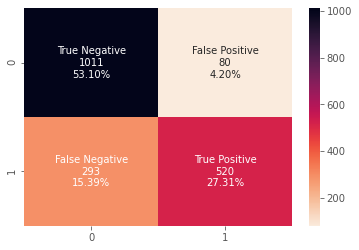

In [45]:
model_evaluation(NB_model)

F1 scores: [0.72637518 0.75900277 0.71339348 0.76912841]
F1 mean score: 0.7419749582467463
Acc scores: [0.79621849 0.81713085 0.78297425 0.81765633]
Acc mean score: 0.8034949791792702
Confusion Matrix: 


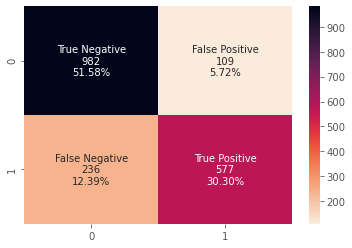

In [46]:
model_evaluation(LR_model)

F1 scores: [0.71637816 0.74818242 0.70066225 0.72126816]
F1 mean score: 0.7216227492363041
Acc scores: [0.7762605  0.79978981 0.76248029 0.77824488]
Acc mean score: 0.7791938701387018
Confusion Matrix: 


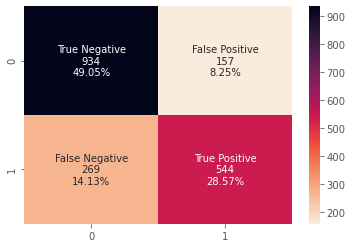

In [47]:
model_evaluation(LGM_model)

In [48]:
sample_sub = pd.read_csv('D:/Python/Anaconda/Kaggle/Working/Natural Language Processing with Disaster Tweets/nlp-getting-started/sample_submission.csv')

In [50]:
y_pre=LR_model.predict(test_vectors)
y_pre=np.round(y_pre).astype(int).reshape(3263)
sub=pd.DataFrame({'id':sample_sub['id'].values.tolist(),'target':y_pre})
sub.to_csv('submission2.csv',index=False)